In [3]:
import pandas as pd
import folium
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20, 6)})

In [4]:
warnings.filterwarnings('ignore')

In [5]:
#Trabajamos con el dataset actualizado
sadi = pd.read_csv('data/cammesa/centrales.csv', sep=",")

In [6]:
sadi.head()

,Unnamed: 0,id,Nombre,Nemo,Tipo,Potencia,Region,F_desde,F_hasta,lat,lon,provincia,Tipo_eco
0,0,639.0,P.E. ARAUCO II (ETAPA 1 Y 2),AR21EO,eolicas,99.75,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.713251,-66.705385,La Rioja,Renovable
1,1,506.0,ARAUCO EOLICO,ARAUEO,eolicas,25.20,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.701939,-66.752040,La Rioja,Renovable
2,2,568.0,ARAUCO EOLICO 2,ARA2EO,eolicas,25.20,CUY,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-28.692980,-66.754425,La Rioja,Renovable
3,3,614.0,EL JUME,JUMEEO,eolicas,8.00,NOA,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-29.419391,-63.709658,Santiago del Estero,Renovable
4,4,669.0,P.E. Achiras,ACHIEO,eolicas,48.00,CEN,2015-01-01T03:00:00Z,9999-12-01T03:00:00Z,-33.213184,-65.080059,Córdoba,Renovable


In [8]:
df_sadi = sadi[['id', 'Nombre', 'Nemo', 'Tipo', 'Potencia', 'Region', 'lat', 'lon','provincia','Tipo_eco']]
df_sadi

,id,Nombre,Nemo,Tipo,Potencia,Region,lat,lon,provincia,Tipo_eco
0,639.0,P.E. ARAUCO II (ETAPA 1 Y 2),AR21EO,eolicas,99.75,NOA,-28.713251,-66.705385,La Rioja,Renovable
1,506.0,ARAUCO EOLICO,ARAUEO,eolicas,25.20,NOA,-28.701939,-66.752040,La Rioja,Renovable
2,568.0,ARAUCO EOLICO 2,ARA2EO,eolicas,25.20,CUY,-28.692980,-66.754425,La Rioja,Renovable
3,614.0,EL JUME,JUMEEO,eolicas,8.00,NOA,-29.419391,-63.709658,Santiago del Estero,Renovable
4,669.0,P.E. Achiras,ACHIEO,eolicas,48.00,CEN,-33.213184,-65.080059,Córdoba,Renovable
...,...,...,...,...,...,...,...,...,...,...
351,734.0,C.T. ARREBEEF ENERGIA,ABEF,termicas,1.50,BSAS,-33.762503,-60.090875,Buenos Aires,No Renovable
352,630.0,G ROJO R.ENERGY,ROJO,termicas,258.00,BSAS,-33.454965,-60.281668,Buenos Aires,No Renovable
353,100.0,ACEROS PARANA,APAR,termicas,150.00,BSAS,-33.364149,-60.145681,Buenos Aires,No Renovable
354,322.0,AES-PARANA,AESP,termicas,870.00,BSAS,-33.354883,-60.171846,Buenos Aires,No Renovable


In [9]:
df_sadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         346 non-null    float64
 1   Nombre     356 non-null    object 
 2   Nemo       346 non-null    object 
 3   Tipo       356 non-null    object 
 4   Potencia   356 non-null    float64
 5   Region     356 non-null    object 
 6   lat        356 non-null    float64
 7   lon        356 non-null    float64
 8   provincia  354 non-null    object 
 9   Tipo_eco   356 non-null    object 
dtypes: float64(4), object(6)
memory usage: 27.9+ KB


In [10]:
df_sadi = df_sadi.dropna()

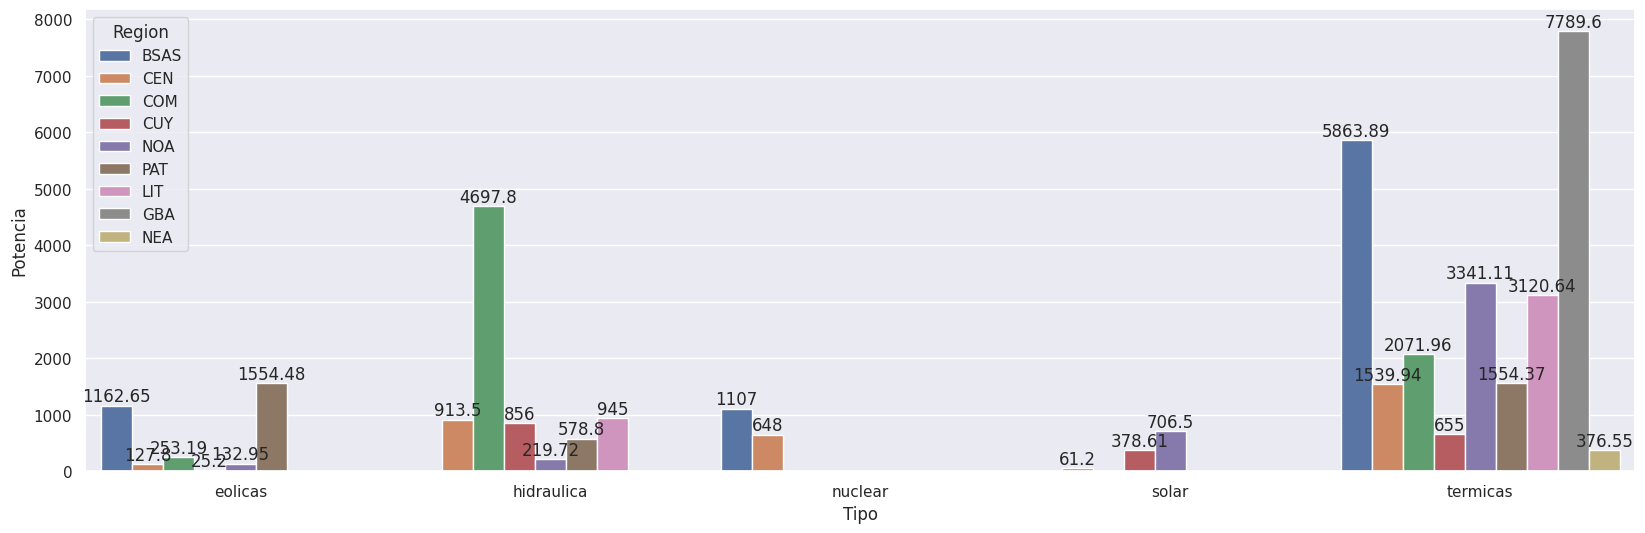

In [11]:
df_sadi_potencias = df_sadi \
    .groupby(['Tipo', 'Region']) \
    .agg({
        'Potencia': np.sum
    }) \
    .reset_index()


ax = sns.barplot(df_sadi_potencias, x='Tipo', y='Potencia', hue='Region', errorbar=None, width=0.9)
for i in ax.containers:
    ax.bar_label(i, )

In [12]:
mapa = folium.Map(location=[-34.6, -58.4], zoom_start=4)

In [13]:
colores = {
    'eolicas': 'green',
    'hidraulica': 'blue',
    'nuclear': 'orange',
    'solar': 'yellow',
    'termicas': 'red',
}

for idx in range(len(df_sadi)):
    location = df_sadi.iloc[idx][['lat', 'lon']]
    folium.Marker(
        location=location,
        popup=f"{df_sadi.iloc[idx]['Tipo']}: {df_sadi.iloc[idx]['Nombre']}",
        #Cada icono tiene el color segun el tipo de central
        icon = folium.Icon(color=colores[df_sadi.iloc[idx]['Tipo']], icon='bolt', prefix='fa')
    ).add_to(mapa)

mapa

In [14]:
#potencia total instalada en cada provincia con el tipo_eco
df_sadi_potencias = df_sadi[['Tipo', 'Region', 'Potencia','provincia','Tipo_eco']] 
df_sadi_potencias_prov = df_sadi_potencias.groupby(['Tipo','provincia','Tipo_eco']).agg({'Potencia': np.sum}).reset_index()
df_sadi_potencias_prov


,Tipo,provincia,Tipo_eco,Potencia
0,eolicas,Buenos Aires,Renovable,1162.65
1,eolicas,Chubut,Renovable,1211.13
2,eolicas,Córdoba,Renovable,127.80
3,eolicas,La Pampa,Renovable,39.60
4,eolicas,La Rioja,Renovable,150.15
5,eolicas,Neuquén,Renovable,100.49
6,eolicas,Río Negro,Renovable,113.10
7,eolicas,Santa Cruz,Renovable,343.35
8,eolicas,Santiago del Estero,Renovable,8.00
9,hidraulica,Chubut,Renovable,578.80


In [15]:
#Potencia total por tipo en cada Region
df_sadi_potencias = df_sadi[['Tipo', 'Region', 'Potencia','provincia']] 
df_sadi_potencias = df_sadi_potencias.groupby(['Tipo', 'Region']).agg({'Potencia': np.sum}).reset_index()
df_sadi_potencias


,Tipo,Region,Potencia
0,eolicas,BSAS,1162.65
1,eolicas,CEN,127.80
2,eolicas,COM,253.19
3,eolicas,CUY,25.20
4,eolicas,NOA,132.95
5,eolicas,PAT,1554.48
6,hidraulica,CEN,913.50
7,hidraulica,COM,4697.80
8,hidraulica,CUY,856.00
9,hidraulica,LIT,945.00


In [16]:
#Potencia total instalada en cada provincia
potencial_prov = df_sadi_potencias_prov.groupby('provincia')['Potencia'].sum().sort_values(ascending=False)
#Convierto a dataframe
potencial_prov = pd.DataFrame(potencial_prov)
potencial_prov

,Potencia
provincia,
Buenos Aires,11806.94
Neuquén,6215.72
CABA,4116.20
Córdoba,3224.64
Santa Fe,3089.04
Chubut,2837.43
Tucumán,1848.03
Salta,1494.42
Mendoza,1481.00


In [17]:
df_sadi_potencias_prov.drop(columns=['Tipo'], inplace=True)
df_sadi_potencias_prov


,provincia,Tipo_eco,Potencia
0,Buenos Aires,Renovable,1162.65
1,Chubut,Renovable,1211.13
2,Córdoba,Renovable,127.80
3,La Pampa,Renovable,39.60
4,La Rioja,Renovable,150.15
5,Neuquén,Renovable,100.49
6,Río Negro,Renovable,113.10
7,Santa Cruz,Renovable,343.35
8,Santiago del Estero,Renovable,8.00
9,Chubut,Renovable,578.80


In [18]:
#Agrego a df_sadi_potencias_prov la potenica total de cada provincia
df_sadi_potencias_prov = df_sadi_potencias_prov.merge(df_sadi_potencias_prov.groupby('provincia')['Potencia'].sum().reset_index(), on='provincia', suffixes=('', '_total'))

In [19]:
df_sadi_potencias_prov

,provincia,Tipo_eco,Potencia,Potencia_total
0,Buenos Aires,Renovable,1162.65,11806.94
1,Buenos Aires,Transicion,1107.00,11806.94
2,Buenos Aires,No Renovable,9537.29,11806.94
3,Chubut,Renovable,1211.13,2837.43
4,Chubut,Renovable,578.80,2837.43
5,Chubut,No Renovable,1047.50,2837.43
6,Córdoba,Renovable,127.80,3224.64
7,Córdoba,Renovable,913.50,3224.64
8,Córdoba,Transicion,648.00,3224.64
9,Córdoba,No Renovable,1535.34,3224.64


In [20]:
# Lista de provincias
provincias_argentina = df_sadi_potencias_prov['provincia'].unique()

# Guardo los resultados
resultados_por_provincia = pd.DataFrame()

# Iterar a través de cada provincia y realizar las operaciones
for provincia in provincias_argentina:
    df_prov = df_sadi_potencias_prov[df_sadi_potencias_prov['provincia'] == provincia]
    df_prov_reno = df_prov[df_prov['Tipo_eco'] == 'Renovable']
    
    # Calcular el ratio_eco para esta provincia específica
    df_prov_reno['Ratio_eco'] = df_prov_reno['Potencia'].sum() / df_prov['Potencia_total']
    
    resultados_por_provincia = pd.concat([resultados_por_provincia, df_prov_reno])
    resultados_por_provincia.dropna(inplace=True)

resultados_por_provincia


,provincia,Tipo_eco,Potencia,Potencia_total,Ratio_eco
0,Buenos Aires,Renovable,1162.65,11806.94,0.098472
3,Chubut,Renovable,1211.13,2837.43,0.630828
4,Chubut,Renovable,578.80,2837.43,0.630828
6,Córdoba,Renovable,127.80,3224.64,0.322920
7,Córdoba,Renovable,913.50,3224.64,0.322920
10,La Pampa,Renovable,39.60,75.60,0.656085
11,La Pampa,Renovable,10.00,75.60,0.656085
13,La Rioja,Renovable,150.15,217.15,0.953949
14,La Rioja,Renovable,57.00,217.15,0.953949
16,Neuquén,Renovable,100.49,6215.72,0.709538


In [21]:
#Me quedo con la provincia y el ratio eco
ratio_prov_eco = resultados_por_provincia[['provincia', 'Ratio_eco']]
#Elimino duplicados
ratio_prov_eco = ratio_prov_eco.drop_duplicates()
ratio_prov_eco

,provincia,Ratio_eco
0,Buenos Aires,0.098472
3,Chubut,0.630828
6,Córdoba,0.322920
10,La Pampa,0.656085
13,La Rioja,0.953949
16,Neuquén,0.709538
19,Río Negro,0.671241
22,Santa Cruz,0.403837
24,Santiago del Estero,0.156963
27,Entre Ríos,0.967643


In [45]:
provs = df_sadi_potencias_prov['provincia'].unique()
print(provs)
#agrego las provincias faltantes a  ratio_prov
total_provs = ratio_prov_eco['provincia'].unique()
list_to_add = []
for prov in provs:
    if prov not in total_provs:
        list_to_add.append({'provincia': prov, 'Ratio_eco': 0})

ratio_provs = pd.concat([ratio_prov_eco, pd.DataFrame(list_to_add)])
#Drop CABA
#ratio_provs.drop(ratio_provs[ratio_provs['provincia'] == 'CABA'].index, inplace=True)
ratio_provs

['Buenos Aires' 'Chubut' 'Córdoba' 'La Pampa' 'La Rioja' 'Neuquén'
 'Río Negro' 'Santa Cruz' 'Santiago del Estero' 'Entre Ríos' 'Jujuy'
 'Mendoza' 'Salta' 'Tucumán' 'Catamarca' 'San Juan' 'San Luis' 'CABA'
 'Chaco' 'Corrientes' 'Formosa' 'Misiones' 'Santa Fe']


,provincia,Ratio_eco
0,Buenos Aires,0.098472
3,Chubut,0.630828
6,Córdoba,0.322920
10,La Pampa,0.656085
13,La Rioja,0.953949
16,Neuquén,0.709538
19,Río Negro,0.671241
22,Santa Cruz,0.403837
24,Santiago del Estero,0.156963
27,Entre Ríos,0.967643


In [31]:
#Creo un colormap para los valores de la columna "ratio_eco"
cmap_eco = plt.cm.get_cmap('RdYlGn')


<Axes: >

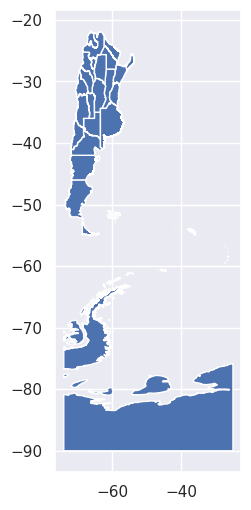

In [38]:
import geopandas as gpd
#Abro provincias.shp file
mapa_argentina = gpd.read_file('data/GobAr/provincias/provincias.shp')
#Ploteo provincias
mapa_argentina.plot()


In [39]:
mapa_argentina.head()

,OBJECTID,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,IGN,Geografía,02,0.020242,0.743806,"POLYGON Z ((-58.34189 -34.63110 0.00000, -58.3..."
1,428,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,IGN,Geografía,58,9.771811,21.515985,"POLYGON Z ((-70.39345 -36.15526 0.00000, -70.3..."
2,429,0,Provincia,Provincia de La Pampa,Provincia,La Pampa,IGN,Geografía,42,14.553019,19.665614,"MULTIPOLYGON Z (((-64.76547 -40.78351 0.00000,..."
3,430,0,Provincia,Provincia de Mendoza,Provincia,Mendoza,IGN,Geografía,50,14.658388,23.259986,"POLYGON Z ((-69.12570 -32.00283 0.00000, -69.1..."
4,431,0,Provincia,Provincia de San Luis,Provincia,San Luis,IGN,Geografía,74,7.333771,14.490196,"POLYGON Z ((-67.05547 -31.85605 0.00000, -67.0..."


In [40]:
mapa_argentina['NAM'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Neuquén', 'La Pampa',
       'Mendoza', 'San Luis', 'Córdoba', 'Santa Fe', 'Entre Ríos',
       'San Juan', 'La Rioja', 'Catamarca', 'Tucumán', 'Jujuy', 'Chaco',
       'Formosa', 'Santiago del Estero',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santa Cruz', 'Chubut', 'Río Negro', 'Buenos Aires', 'Corrientes',
       'Misiones', 'Salta'], dtype=object)

In [55]:
#ver la informacion de provincias.shp
mapa_argentina.head(10)
#Cambio mapa_argentina['NAM'] == 'Ciudad Autónoma de Buenos Aires' por CABA
#mapa_argentina.loc[mapa_argentina['NAM'] == 'Ciudad Autónoma de Buenos Aires', 'NAM'] = 'Buenos Aires'	
#cambio tierra del fuego
mapa_argentina.loc[mapa_argentina['NAM'] == 'Tierra del Fuego, Antártida e Islas del Atlántico Sur', 'NAM'] = 'Tierra del Fuego'
#drop Ciudad Autonoma de buenos Aires
mapa_argentina = mapa_argentina[mapa_argentina.NAM != 'Ciudad Autónoma de Buenos Aires']


In [56]:
#Uno mapa_argentina y ratio_provs
argentina_ratio = mapa_argentina.merge(ratio_provs, left_on='NAM', right_on = 'provincia', how = 'left')


Text(1009.05732476902, 0.5, 'Latitud')

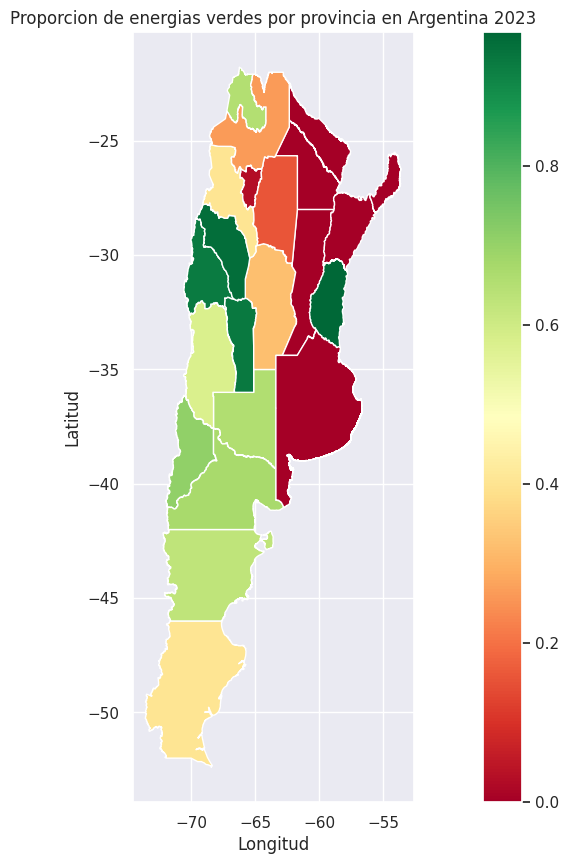

In [67]:
fig, ax = plt.subplots(figsize=(18, 10))  # Tamaño de la figura

argentina_ratio.plot(ax=ax, column='Ratio_eco', legend = True, cmap = 'RdYlGn')

plt.title("Proporcion de energias verdes por provincia en Argentina 2023")
plt.xlabel("Longitud")
plt.ylabel("Latitud")